In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from scipy.special import lambertw

import string

## Simulation of theoretical DNA distribution.

### Numerical simulation

#### Population distribution over generation time (0--1)
$n(a)=2\cdot \ln(2) e^{-a\ \ln(2)} = \ln(2)\cdot 2^{-a+1}$

$\int^{1}_{0}n(a)\mathrm{d}a=1$


$P(x)=\lambda e^{-\lambda x}$

$P(X\leq x)=1-e^{-\lambda x}$

$\lambda=\ln(2)$

$P(X \leq 1)=1-e^{-\ln(2)}=0.5$


How does this come from?

$n(a)=\ln(2)\cdot 2^{-a+1}$
$\ \ = 2^{-a+1}\cdot \ln(2)\cdot (-1)\cdot(-1)$
$\ \ = -\frac{d}{da}[2^{1-a}]$

For an active growing culture: $N(t)=2^{t/\tau}$

$x=t/\tau$

The new born cells at every moment:
$\frac{d}{dx}2^x=\ln(2)\cdot 2^{x}$




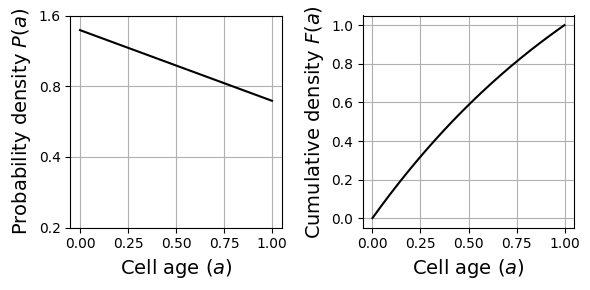

In [2]:
a = np.linspace(0, 0.999, 1000)
#n = 2 * np.log(2) * np.exp(-a*np.log(2))
n = np.log(2)*2**(1-a)

fig, axs = plt.subplots(ncols=2, figsize=(6,3))
axs[0].plot(a, n, 'k-')
axs[0].set_xlabel('Cell age ($a$)', fontsize=14)
axs[0].set_ylabel('Probability density $P(a)$', fontsize=14)

axs[0].set_yscale('log', base=2)
axs[0].set_yticks([0.2, 0.4, 0.8, 1.6])
axs[0].set_yticklabels([0.2, 0.4, 0.8, 1.6])
axs[0].set_ylim(bottom=0.2)
axs[0].grid()

cdf_values=np.cumsum(n)*(a[1]-a[0])
cdf = interp1d(cdf_values, a)
axs[1].plot(a, cdf_values, 'k-')
axs[1].set_xlabel('Cell age ($a$)', fontsize=14)
axs[1].set_ylabel('Cumulative density $F(a)$', fontsize=14)
axs[1].grid()

fig.tight_layout()
fig.show()

Theoretical DNA (genome equivalent) per cell 
Numerical analysis: 1.4213019521692016 
Symbolic analysis: 1.421301937942768


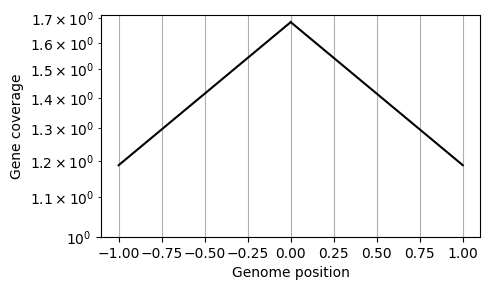

In [3]:
#Assign the cell cycle parameters
tau=80

C=40/tau #C can be between 0--2.
D=20/tau #D should be always smaller than 1 (to have biological interpretation)
#D=0.5/0.45

k=1/C #DNA replication elongation rate.

#Gene coverage

locus_pos=np.arange(0,1.001,0.001)
gene_coverage=2**((1-locus_pos)*C+D)

print('Theoretical DNA (genome equivalent) per cell',
      '\nNumerical analysis:', (2*np.sum(gene_coverage)-gene_coverage[0]-gene_coverage[-1])*0.001/2,
      '\nSymbolic analysis:', (2**(C+D)-2**(D))/(C*np.log(2)))

fig, axs = plt.subplots(figsize=(5,3))
axs.plot(locus_pos, gene_coverage, 'k-')
axs.plot(-locus_pos, gene_coverage, 'k-')
axs.set_yscale('log')

axs.set_xlabel('Genome position')
axs.set_ylabel('Gene coverage')

axs.set_ylim(bottom=1)
axs.grid()
fig.tight_layout()
fig.show()

#### Number of replication forks over one generation.

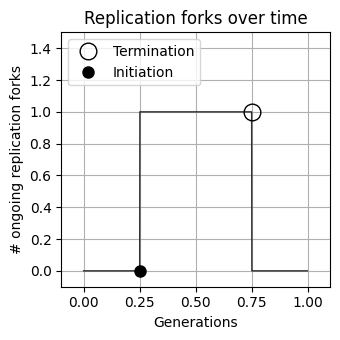

In [4]:
#integral number of division cycles
f_CD=np.floor(C+D).astype(int)
f_D=np.floor(D).astype(int)
c_CD=np.ceil(C+D).astype(int)
c_D=np.ceil(D).astype(int)

#Four targeted time points:
#0
#a_init
#a_ter
#1
a_ter=c_D-D
a_init=c_CD-(C+D)

initiation_array=np.zeros(len(a))
initiation_array[a<=a_init]=2**f_CD-1
initiation_array[a>a_init]=2**c_CD-1

termination_array=np.zeros(len(a))
termination_array[a<=a_ter]=2**f_D-1
termination_array[a>a_ter]=2**c_D-1

replication_fork_array=initiation_array-termination_array

fig, axs=plt.subplots(figsize=(3.5,3.5))

axs.plot(a_ter,
         np.mean(replication_fork_array[abs(a-a_ter)<0.001]),
         'ko', mfc='none', markersize=12, label='Termination')
axs.plot(a_init,
         np.mean(replication_fork_array[abs(a-a_init)<0.001]),
         'ko', label='Initiation', markersize=8)

axs.plot(a, replication_fork_array, 'k-', linewidth=1, alpha=0.8)

axs.legend(loc=2)
axs.grid()
axs.set_xlim(-0.1,1.1)
axs.set_ylim([-0.1, replication_fork_array.max()*1.5])

axs.set_xlabel('Generations')
axs.set_ylabel('# ongoing replication forks')
axs.set_title('Replication forks over time')

fig.tight_layout()
fig.show()

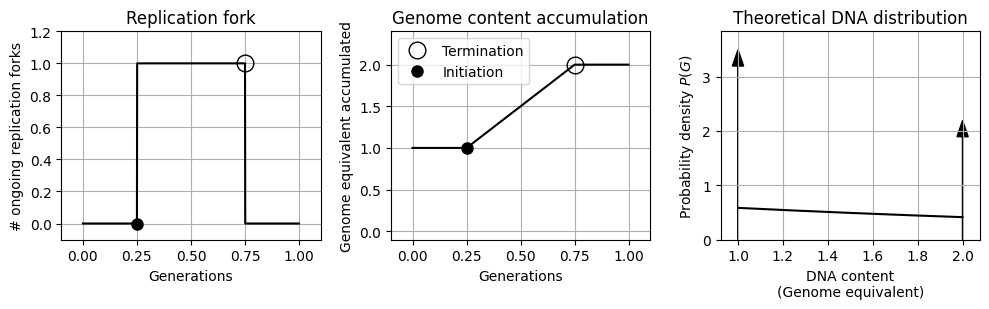

In [5]:
F=replication_fork_array
G=np.ones(len(a))
single_G=round(sum(F)/C*0.001,3)
G=single_G+np.cumsum(F)/C*0.001

%matplotlib inline
fig, axs=plt.subplots(ncols=3, figsize=(10,3.2))
axs[0].plot(a, F, 'k-')
axs[0].plot(a_ter,
         np.mean(replication_fork_array[abs(a-a_ter)<0.001]),
         'ko', mfc='none', markersize=12, label='Termination')
axs[0].plot(a_init,
         np.mean(replication_fork_array[abs(a-a_init)<0.001]),
         'ko', label='Initiation', markersize=8)

axs[0].grid()
axs[0].set_xlim(-0.1,1.1)
axs[0].set_ylim([-0.1, F.max()*1.2])

axs[0].set_xlabel('Generations')
axs[0].set_ylabel('# ongoing replication forks')
axs[0].set_title('Replication fork')

axs[1].plot(a, G, 'k-')
axs[1].plot(a_ter, G[abs(a-a_ter)<0.001].mean(), 'ko', mfc='none', markersize=12, label='Termination')
axs[1].plot(a_init, G[abs(a-a_init)<0.001].mean(), 'ko', markersize=8, label='Initiation')
axs[1].grid()
axs[1].set_xlim(-0.1,1.1)
axs[1].set_ylim([-0.1, G.max()*1.2])
axs[1].set_xlabel('Generations')
axs[1].set_ylabel('Genome equivalent accumulated')
axs[1].set_title('Genome content accumulation')
axs[1].legend()

replicating_fractions=n[F!=0].sum()/1000
G1=G[F!=0]
n_G1=n[F!=0]/F[F!=0]*C
replicating_fractions_0=np.dot(np.diff(G1), n_G1[1::])

axs[2].plot(G1, n_G1, 'k-')

G0=np.unique(G[F==0])
n_G0=np.array([])
if len(G0!=0):
  all_spike_intensities=[]
  for i in range(len(G0)):
    spike_intensity=n[G==G0[i]].sum()
    n_G0=np.r_[n_G0, spike_intensity]
    axs[2].arrow(G0[i], 0, 0, spike_intensity*0.01, width=0.001, head_width=0.05,
               head_length=0.3, color='k')
    all_spike_intensities.append(spike_intensity)
  axs[2].set_ylim(0, np.max(all_spike_intensities)*0.01*1.2)
else:
  axs[2].set_ylim(bottom=0)
#axs[2].set_xlim(0,10)
axs[2].set_xlabel('DNA content\n(Genome equivalent)')
axs[2].set_ylabel('Probability density $P(G)$')
axs[2].set_title('Theoretical DNA distribution')
axs[2].grid()
#axs[2].set_yscale('log')
fig.tight_layout()
fig.show()

In [6]:
#DNA content per cell in the unit of number of genome equivalent.
#Comparison between numerical simulation and theoretical formula.
print('Numerically simulated DNA (genome equivalent) per cell: ',
      np.sum(n_G1[0:-1]*G1[0:-1]*np.diff(G1))+np.sum(n_G0*G0*0.001))

print('Theoretical DNA (genome equivalent) per cell: ',
      (2**(C+D)-2**(D))/(C*np.log(2)))

Numerically simulated DNA (genome equivalent) per cell:  1.421301881037036
Theoretical DNA (genome equivalent) per cell:  1.421301937942768


### Analytical (symbolic) simulation

In [8]:
def get_genome_distribution(C, time_points, Forks, Genome_points):
  G_linspace=np.array([])
  n_G_A=np.array([])
  for Fi in range(len(Forks)):
    Fork=Forks[Fi]
    if Fork!=0:
      G_linspace_temp = np.arange(Genome_points[Fi]+0.001, Genome_points[Fi+1]-0.001, 0.001)
      #print(np.mean(np.diff(G_linspace_temp)))
      n_G_A_temp = np.log(2)*2**(1-
                                  (G_linspace_temp-Genome_points[Fi]+
                                    time_points[Fi]*Fork/C
                                  )/(Fork/C)
                                )/(Fork/C)

    else:
      G_linspace_temp=Genome_points[Fi]
      n_G_A_temp=(2**(1-time_points[Fi])-2**(1-time_points[Fi+1]))/0.001
    G_linspace=np.r_[G_linspace, G_linspace_temp]
    n_G_A=np.r_[n_G_A, n_G_A_temp]
  #print(np.min(np.diff(G_linspace)))
  return (G_linspace, n_G_A)

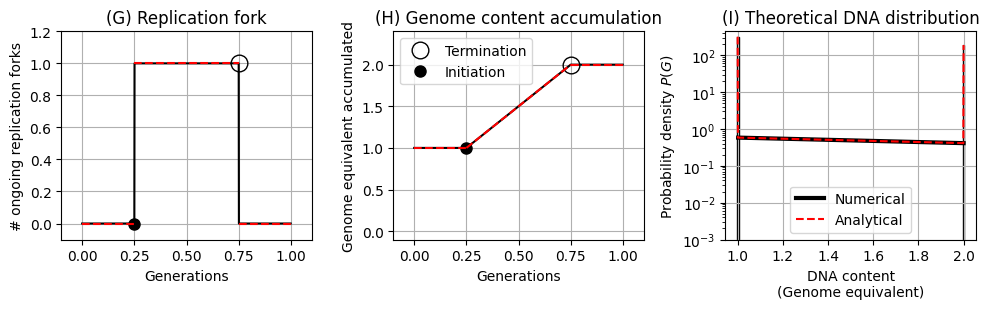

In [9]:
%matplotlib inline
fig, axs=plt.subplots(ncols=3, figsize=(10,3.2))

#Results of numerical simulation
axs[0].plot(a, F, 'k-')
axs[0].plot(a_ter,
         np.mean(replication_fork_array[abs(a-a_ter)<0.001]),
         'ko', mfc='none', markersize=12, label='Termination')
axs[0].plot(a_init,
         np.mean(replication_fork_array[abs(a-a_init)<0.001]),
         'ko', label='Initiation', markersize=8)

axs[0].grid()
axs[0].set_xlim(-0.1,1.1)
axs[0].set_ylim([-0.1, F.max()*1.2])

axs[0].set_xlabel('Generations')
axs[0].set_ylabel('# ongoing replication forks')
axs[0].set_title('(G) Replication fork')

axs[1].plot(a, G, 'k-')
axs[1].plot(a_ter, G[abs(a-a_ter)<0.001].mean(), 'ko', mfc='none', markersize=12, label='Termination')
axs[1].plot(a_init, G[abs(a-a_init)<0.001].mean(), 'ko', markersize=8, label='Initiation')
axs[1].grid()
axs[1].set_xlim(-0.1,1.1)
axs[1].set_ylim([-0.1, G.max()*1.2])
axs[1].set_xlabel('Generations')
axs[1].set_ylabel('Genome equivalent accumulated')
axs[1].set_title('(H) Genome content accumulation')
axs[1].legend()

axs[2].plot(G1, n_G1, 'k-', label='Numerical', linewidth=3)

n_G0=[]
if len(G0!=0):
  all_spike_intensities=[]
  for i in range(len(G0)):
    spike_intensity=n[G==G0[i]].sum()
    n_G0=np.r_[n_G0, spike_intensity]
    axs[2].arrow(G0[i], 0, 0, spike_intensity, width=0.008, head_width=0,
               head_length=0, color='k')
    all_spike_intensities.append(spike_intensity)

#axs[2].set_xlim(0,10)
axs[2].set_xlabel('DNA content\n(Genome equivalent)')
axs[2].set_ylabel('Probability density $P(G)$')
axs[2].set_title('(I) Theoretical DNA distribution')
axs[2].grid()

#Results of analytical solution
if a_init>a_ter:
  time_points=np.array([0, a_ter, a_init, 1])
  Forks=np.array([(2**f_CD-1)-(2**f_D-1), (2**f_CD-1)-(2**c_D-1), (2**c_CD-1)-(2**c_D-1)])
else:
  time_points=np.array([0, a_init, a_ter, 1])
  Forks=np.array([(2**f_CD-1)-(2**f_D-1), (2**c_CD-1)-(2**f_D-1), (2**c_CD-1)-(2**c_D-1)])

coeff_matrix=np.ones((4,3))+np.tril(np.ones((4,3)),-1)
Genome_points=np.matmul(coeff_matrix,np.diff(time_points)*Forks/C)

for i in range(len(Forks)):
  axs[0].plot([time_points[i], time_points[i+1]], [Forks[i],Forks[i]], 'r--')
  axs[1].plot([time_points[i], time_points[i+1]], [Genome_points[i],Genome_points[i+1]], 'r--')

(G_linspace, n_G_A) = get_genome_distribution(C, time_points, Forks, Genome_points)

axs[2].plot(G_linspace, n_G_A, 'r--', label='Analytical')
axs[2].set_yscale('log')
axs[2].set_ylim(bottom=0.001)
axs[2].legend(loc=8)

fig.tight_layout()
fig.show()

In [10]:
#DNA content per cell in the unit of number of genome equivalent.
#Comparison between numerical simulation and theoretical formula.
print('Numerical simulated DNA (genome equivalent) per cell: ',
      np.sum(n_G1[0:-1]*G1[0:-1]*np.diff(G1))+np.sum(n_G0*G0*0.001))

print('Analytical simulated DNA (genome equivalent) per cell: ',
      np.dot(G_linspace,n_G_A*0.001))

print('Theoretical DNA (genome equivalent) per cell: ',
      (2**(C+D)-2**(D))/(C*np.log(2)))

Numerical simulated DNA (genome equivalent) per cell:  1.421301881037036
Analytical simulated DNA (genome equivalent) per cell:  1.420598336474414
Theoretical DNA (genome equivalent) per cell:  1.421301937942768


In [11]:
def V_func(xi, u, u0, xj):
  return np.exp(-0.5*((xi-xj)/(u*xj+u0))**2)/(np.sqrt(2*np.pi)*u*xj)

xi_list = np.linspace(0.5, 2.5, 2001)
N_xi = [np.sum(n_G_A*V_func(xi, 0.05, 0, G_linspace))*0.001 for xi in xi_list]

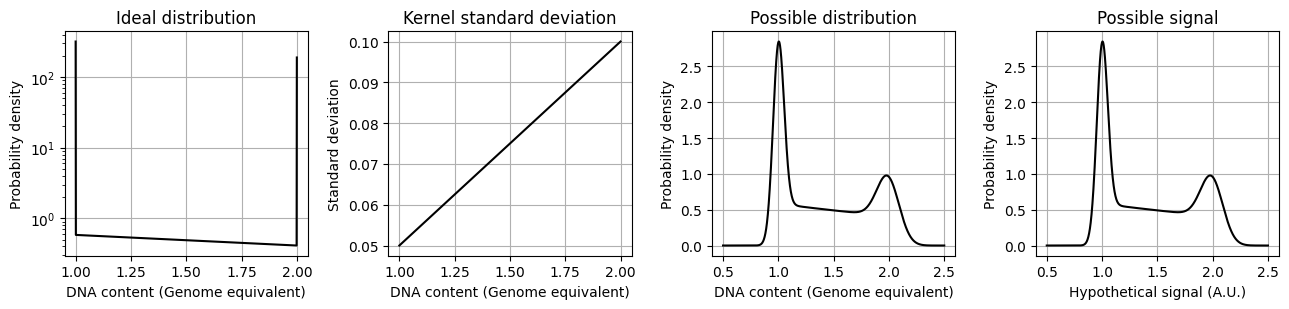

In [12]:
%matplotlib inline

fig, axs=plt.subplots(ncols=4, figsize=(13,3.2))

axs[0].plot(G_linspace, n_G_A, 'k-')
axs[0].set_yscale('log')
axs[0].set_title('Ideal distribution')
axs[0].set_xlabel('DNA content (Genome equivalent)')
axs[0].set_ylabel('Probability density')
axs[0].grid()

u=0.05
u0=0
axs[1].plot(G_linspace, G_linspace*u+u0,'k-')
axs[1].set_title('Kernel standard deviation')
axs[1].set_xlabel('DNA content (Genome equivalent)')
axs[1].set_ylabel('Standard deviation')
axs[1].grid()

axs[2].plot(xi_list, N_xi, 'k-')
axs[2].set_title('Possible distribution')
axs[2].set_xlabel('DNA content (Genome equivalent)')
axs[2].set_ylabel('Probability density')
axs[2].grid()

axs[3].plot(xi_list, N_xi, 'k-')
axs[3].set_title('Possible signal')
axs[3].set_xlabel('Hypothetical signal (A.U.)')
axs[3].set_ylabel('Probability density')
axs[3].grid()

fig.savefig('Convolution_example_CV.pdf')
fig.tight_layout()
fig.show()

In [17]:
mean_DNA_content=np.dot(n_G_A, G_linspace)/1000
#oriC_per_cell=np.dot(n_G_A, np.ceil(G_linspace))/1000
oriC_per_cell=np.dot(n_G_A, 2**np.ceil(np.log2(G_linspace)))/1000

A=mean_DNA_content/oriC_per_cell
PTR=abs(-1/(A*lambertw(-1/A*np.exp(-1/A),0)))
new_C=np.log2(PTR)
new_D=np.log2(oriC_per_cell)-np.log2(PTR)

new_C, C, new_D, D

(0.4997040891123802, 0.5, 0.24944211336413746, 0.25)

In [18]:
np.dot(xi_list, N_xi)/1000, mean_DNA_content

(1.4205981992219787, 1.4205983364744144)

In [20]:
def get_replication_forks(C,D):
  C = abs(C)
  D = abs(D)
  #integral number of division cycles
  f_CD=np.floor(C+D).astype(int)
  f_D=np.floor(D).astype(int)
  c_CD=np.ceil(C+D).astype(int)
  c_D=np.ceil(D).astype(int)

  #Four targeted time points:
  #0
  #a_init
  #a_ter
  #1
  a_ter=c_D-D
  a_init=c_CD-(C+D)

  if a_init>a_ter:
    time_points=np.array([0, a_ter, a_init, 1])
    Forks=np.array([(2**f_CD-1)-(2**f_D-1), (2**f_CD-1)-(2**c_D-1), (2**c_CD-1)-(2**c_D-1)])
  else:
    time_points=np.array([0, a_init, a_ter, 1])
    Forks=np.array([(2**f_CD-1)-(2**f_D-1), (2**c_CD-1)-(2**f_D-1), (2**c_CD-1)-(2**c_D-1)])

  coeff_matrix=np.ones((4,3))+np.tril(np.ones((4,3)),-1)
  Genome_points=np.matmul(coeff_matrix,np.diff(time_points)*Forks/C)

  return time_points, Forks, Genome_points

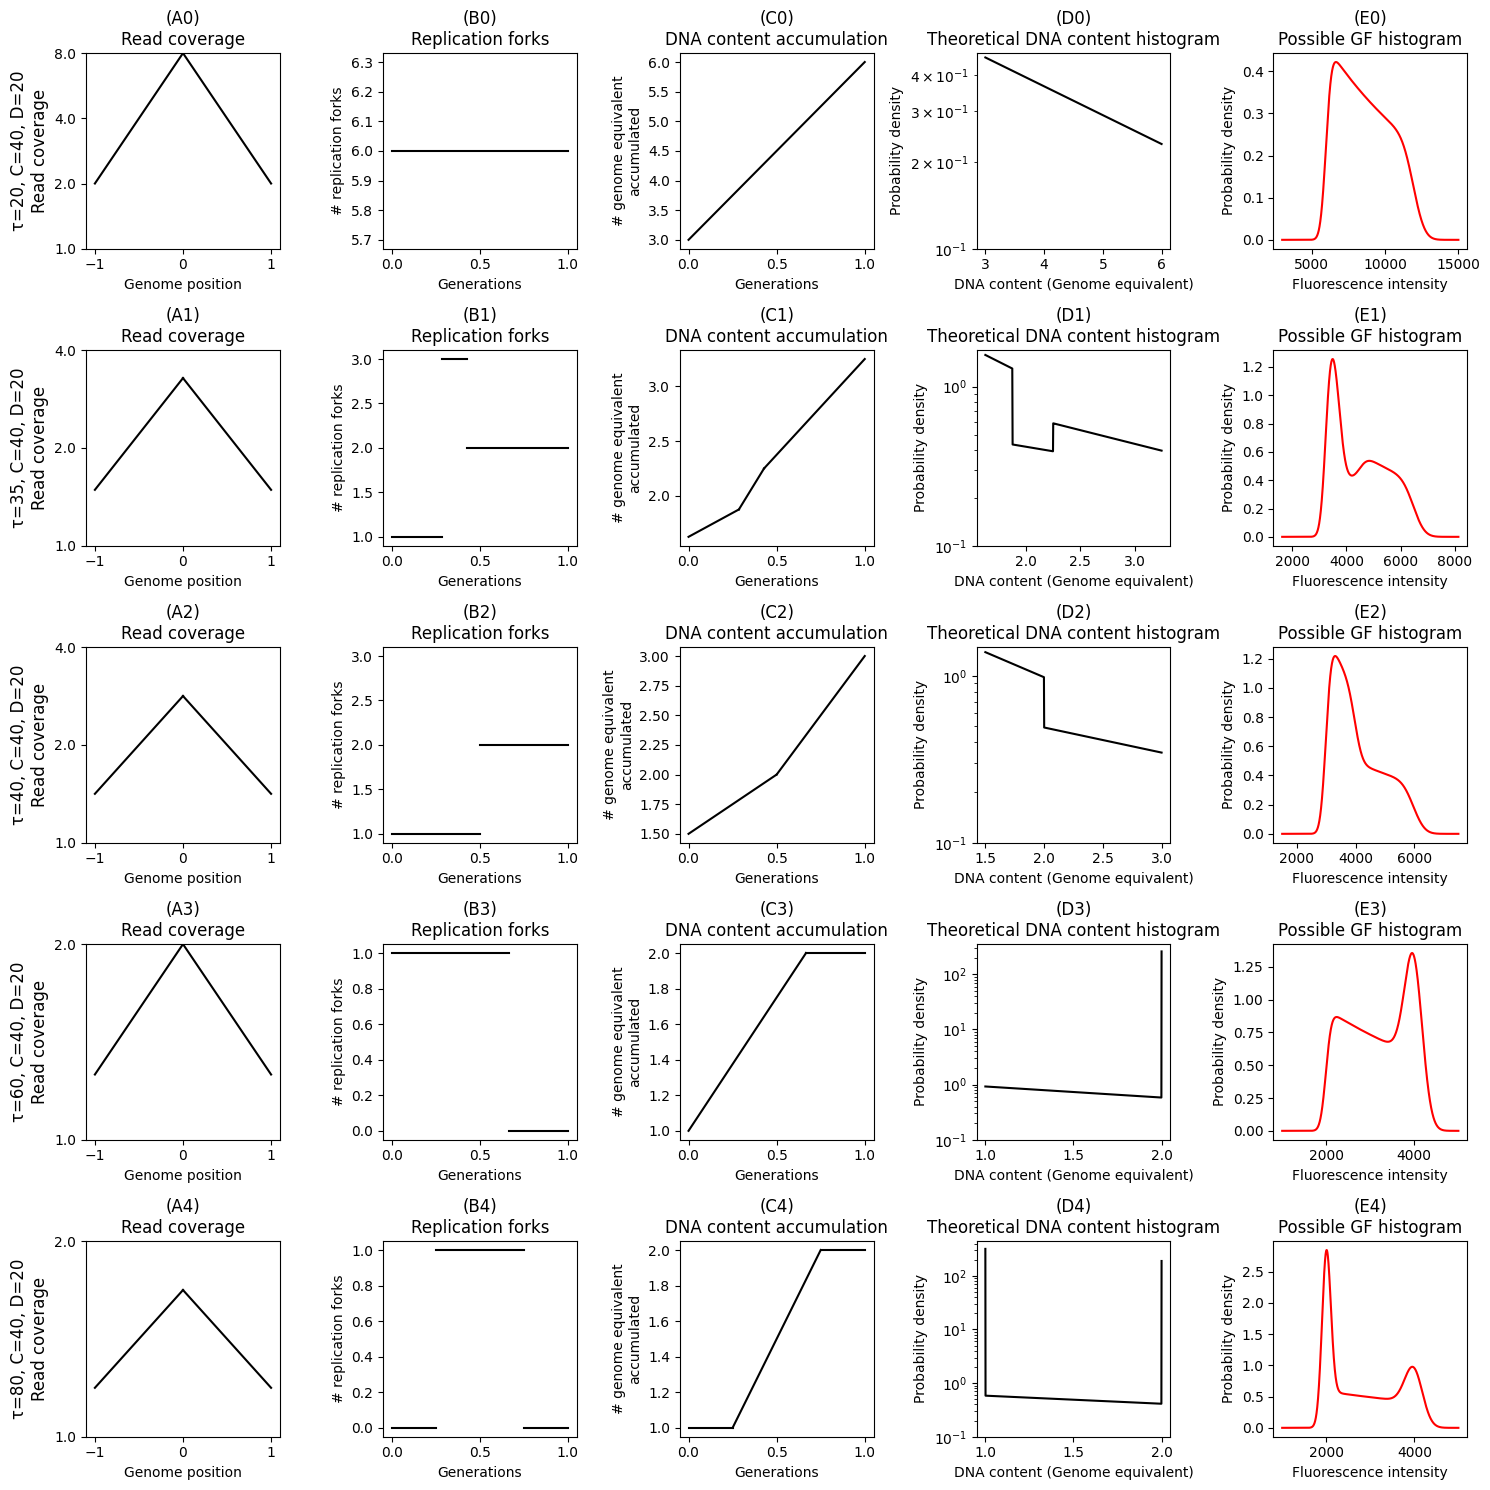

In [24]:
G1_signal=2000
sigma=0.1
u=0.05
u0=0
C=40
D=20

alphabet_string = string.ascii_uppercase
alphabet_list = list(alphabet_string)

tau_list=np.array([20,35,40,60,80])

fig, axss = plt.subplots(ncols=5, nrows=len(tau_list), figsize=(15,3*len(tau_list)))
for i in range(len(tau_list)):
  tau=tau_list[i]
  (time_points, Forks, Genome_points) = get_replication_forks(C/tau,D/tau)
  (G_linspace, n_G_A) = get_genome_distribution(C/tau, time_points, Forks, Genome_points)

  xi_list = np.arange(G_linspace[int(np.floor(len(G_linspace)/2))]-G_linspace[0],
                      G_linspace[int(np.floor(len(G_linspace)/2))]+G_linspace[1], 0.001)
  N_xi = [np.sum(n_G_A*V_func(xi, u, u0, G_linspace))*0.001 for xi in xi_list]

  axs=axss[i]

  gene_coverage=2**((1-locus_pos)*C/tau+D/tau)
  axs[0].plot(locus_pos, gene_coverage, 'k-')
  axs[0].plot(-locus_pos, gene_coverage, 'k-')
  axs[0].set_yscale('log',base=2)
  max_ytick=int(np.ceil(np.max(gene_coverage)))
  axs[0].set_ylim(1,max_ytick)
  axs[0].set_yticks(2**np.arange(0, np.log2(max_ytick)+1, 1))
  axs[0].set_yticklabels(2**np.arange(0, np.log2(max_ytick)+1, 1))
  axs[0].set_xlabel('Genome position')
  axs[0].set_ylabel('τ='+str(tau)+', C=40, D=20'+'\nRead coverage', fontsize=12)

  for j in range(len(Forks)):
    axs[1].plot([time_points[j], time_points[j+1]], [Forks[j],Forks[j]], 'k-')
    axs[2].plot([time_points[j], time_points[j+1]], [Genome_points[j],Genome_points[j+1]], 'k-')
  axs[1].set_xlabel('Generations')
  axs[1].set_ylabel('# replication forks')
  axs[2].set_xlabel('Generations')
  axs[2].set_ylabel('# genome equivalent\naccumulated')

  axs[3].plot(G_linspace, n_G_A, 'k-')
  axs[3].set_yscale('log')
  axs[3].set_ylim(bottom=0.1)
  axs[3].set_xlabel('DNA content (Genome equivalent)')
  axs[3].set_ylabel('Probability density')

  axs[4].plot(2000*xi_list, N_xi, 'r-')
  axs[4].set_xlabel('Fluorescence intensity')
  axs[4].set_ylabel('Probability density')

  a_i=0
  axs[0].set_title('('+alphabet_list[a_i]+str(i)+')\nRead coverage')
  a_i+=1
  axs[1].set_title('('+alphabet_list[a_i]+str(i)+')\nReplication forks')
  a_i+=1
  axs[2].set_title('('+alphabet_list[a_i]+str(i)+')\nDNA content accumulation')
  a_i+=1
  axs[3].set_title('('+alphabet_list[a_i]+str(i)+')\nTheoretical DNA content histogram')
  a_i+=1
  axs[4].set_title('('+alphabet_list[a_i]+str(i)+')\nPossible GF histogram')
  a_i+=1

fig.tight_layout()
fig.savefig('Tau_C_D.pdf')
fig.show()